# Homework

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression, overlay_simple_linear_model,plot_simple_residuals
from scipy.optimize import curve_fit

**Exercise 1:** What are the two "specialities" of machine learning? Pick one and in your own words, explain what it means. `

Minimal human intervension: Machine learning involves figuring out the model yourself, therefore, the model for machine learning is supposed to be as general as possible. Complex data set: very high dimensions of data, for example, images.

**Exercise 2:** What is the difference between a regression task and a classification task?

For regression we want to predict a quantitative variable, and for classification, a qualitative one. 

**Exercise 3:** 
1. What is parametric fitting in your understanding?
2. Given the data $x = 1,2,3,4,5, y_1 = 2,4,6,8,10, y_2 = 2,4,8,16,32,$ what function $f_1, f_2$ will you use to fit $y_1, y_2$? Why do you choose those?
3. Why is parametric fitting somehow not machine learning?

1. It is a process of constructing a curve, or mathematical function, that has the best fit to a series of data points.
2. f1: y=2x, f2:y=x^2, they best fit the data
3. Because it requires a lot of human intervension

**Exercise 4:** Take a look at the following residual plots. Residuals can be helpful in assessing if our model is overpredicting or underpredicting certain values. Assign the variable bestplot to the letter corresponding to which residual plot indicates a good fit for a linear model.

<img src='residplots.png' width="600" height="600">

In [2]:
bestplot = 'a'

**Exercise 5:** Observe the following graphs. Assign each graph variable to one of the following strings: 'overfitting', 'underfitting', or 'bestfit'.
<img src='overfit-underfit.png' width="800" height="800">

In [3]:
graph1 = "underfitting"
graph2 = "bestfit"
graph3 = "overfitting"

**Exercise 6:** What are the 3 sets we split our initial data set into?

Train, validation, test

**Exercise 7:** Refer to the graphs below when answering the following questions (Exercise 6 and 7).
<img src='training_vs_test_error.png' width="800" height="800">
As we increase the degree of our model, what happens to the training error and what happens to the test error? 

Training goes down and test goes up

**Exercise 8:** What is the issue with just increasing the degree of our model to get the lowest training error possible?

Overfitting

**Exercise 9:** Find the gradient for ridge loss, most concretely, when $L(\theta, \textbf{y}, \alpha)
= (\frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2) + \frac{\alpha }{2}\sum_{i = 1}^{n}\theta ^2$
find $\frac{\partial}{\partial \hat{\theta}} L(\theta, \textbf{y},\alpha)$, you can have a look at the class example, they are really similar.

$$
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2+ \frac{\alpha }{2}\sum_{i = 1}^{n}\theta ^2\\
\frac{\partial}{\partial \hat{\theta}} L(\theta, \textbf{y}) 
&= \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \theta)+\alpha n\theta\\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) +\alpha n\theta\\
\end{aligned}
$$

**Exercise 10:** Following the last part of the exercise, you've already fitted your model, now let's test the performance. Make sure you check the code for the previous example we went through in class.

1. copy what you had from the exercise here.

In [80]:
import pandas as pd

mpg = pd.read_csv("./mpg_category.csv", index_col="name")

#exercise part 1
new_old = []
for i in mpg["Old?"].values:
    if i == 'old':
        new_old.append(1)
    if i == 'new':
        new_old.append(0)
mpg['Old?'] = new_old

#exercise part 2
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0)

#exercise part 3
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="newton-cg", C=10)
X = mpg_train[["weight"]]
Y = mpg_train[["Old?"]].values.ravel()
softmax_reg.fit(X, Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

2. create the test data set and make the prediction on test dataset

In [81]:
X_test = mpg_test[["weight"]]
Y_test = mpg_test[["Old?"]].values.ravel()
pred = softmax_reg.predict(X_test)

(array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]))

3. Make the confusion matrix and tell me how you interpret each of the cell in the confusion matrix. What does different depth of blue means. You can just run the cell below, assumed what you did above is correct. You just have to answer your understanding.

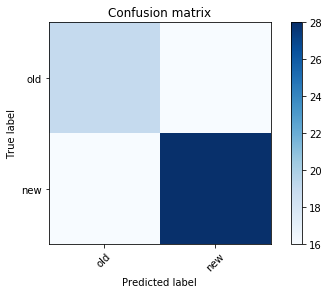

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, pred)
X_label = ['old',  'new']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(X_label))
    plt.xticks(tick_marks, X_label, rotation=45)
    plt.yticks(tick_marks, X_label,)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_matrix)
# confusion_matrix

Your Answer Here

In [12]:
# be sure to hit save (File > Save and Checkpoint) or Ctrl/Command-S before you run the cell!
from submit import create_and_submit

create_and_submit(['Intro to Machine Learning Homework.ipynb'], verbose=True)

Parsed Intro to Machine Learning Homework.ipynb
Enter your Berkeley email address: xinyiren@berkeley.edu
Posting answers for Intro to Machine Learning Homework
Your submission: {'exercise-1': 'Your Answer Here', 'exercise-1_output': None, 'exercise-2': 'Your Answer Here', 'exercise-2_output': None, 'exercise-3': 'Your Answer Here', 'exercise-3_output': None, 'exercise-4': "bestplot = 'Put your letter answer between these quotes'", 'exercise-4_output': None, 'exercise-5': 'graph1 = "Put answer here"\ngraph2 = "Put answer here"\ngraph3 = "Put answer here"', 'exercise-5_output': None, 'exercise-6': 'Your Answer Here', 'exercise-6_output': None, 'exercise-7': 'Your Answer Here', 'exercise-7_output': None, 'exercise-8': 'Your Answer Here', 'exercise-8_output': None, 'exercise-9': 'Your Answer Here', 'exercise-9_output': None, 'exercise-10-1': 'import pandas as pd\n\nmpg = pd.read_csv("./mpg_category.csv", index_col="name")\n\n#exercise part 1\nmpg[\'Old?\'] = ... \n\n#exercise part 2\nmpg_t